In [2]:
import time
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from pageRank import *
from os import listdir
from os.path import isfile, join

In [15]:
sys.argv = str.split("pageRank.py ./data/dolphins.csv SMALL 0.9 0.00001", ' ')
if len(sys.argv) == 5:
    _, datafile, dataformat, d, epsilon = sys.argv
    if dataformat != 'SMALL' and dataformat != 'SNAP':
        print("Usage1: python3 pageRank.py <datafile.>[csv/txt] <dataformat>[SNAP/SMALL] <d>[0-1] <epsilon>[~0.00001]")
        exit(1)        
else:
    print("Usage2: python3 pageRank.py <datafile.>[csv/txt] <dataformat>[SNAP/SMALL] <d>[0-1] <epsilon>[~0.00001]")
    exit(1)

edges, names = readData(datafile, dataformat)
adj = createAdjMatrix(edges,names)
adj = fixSinkNodes(adj)    
adj = scaleAdjMatrix(adj)
p, numiters = iteratePageRank(adj)
printResults(p, names)

+----+-------------+------------+
|    | actor       |   pagerank |
|----+-------------+------------|
|  0 | Grin        | 0.0334828  |
|  1 | Jet         | 0.0315669  |
|  2 | Trigger     | 0.0310706  |
|  3 | SN4         | 0.0310249  |
|  4 | Topless     | 0.0306923  |
|  5 | Web         | 0.0303812  |
|  6 | Scabs       | 0.0290552  |
|  7 | Patchback   | 0.0267463  |
|  8 | Gallatin    | 0.0266752  |
|  9 | Kringel     | 0.0254863  |
| 10 | Beescratch  | 0.0252033  |
| 11 | SN63        | 0.0240755  |
| 12 | Feather     | 0.0237625  |
| 13 | SN9         | 0.0227249  |
| 14 | Upbang      | 0.0222275  |
| 15 | Stripes     | 0.0216593  |
| 16 | SN100       | 0.0209554  |
| 17 | DN21        | 0.020264   |
| 18 | Haecksel    | 0.0202603  |
| 19 | Jonah       | 0.0199332  |
| 20 | TR99        | 0.0198271  |
| 21 | SN96        | 0.0178132  |
| 22 | TR77        | 0.0176232  |
| 23 | Double      | 0.0174096  |
| 24 | Beak        | 0.0173211  |
| 25 | MN105       | 0.0173091  |
| 26 | MN83   

In [2]:
files = np.array([f for f in listdir("./data/") if isfile(join("./data/", f))])
snapMask = [re.search("\..*", file).group(0) == '.txt' for file in files] 
np.logical_not(snapMask)

array([ True, False,  True, False,  True,  True, False, False, False])

In [23]:
dataSmall = [] # [name, readtime, processing time, numiters, ps]

for f in files[np.logical_not(snapMask)]:
    newrow = []
    newrow.append(f)
    
    tic = time.process_time()
    edges, names = readData("./data/" + f, "SMALL")
    adj = createAdjMatrix(edges,names)
    adj = fixSinkNodes(adj)    
    adj = scaleAdjMatrix(adj)
    tock = time.process_time()
    newrow.append(len(edges))
    newrow.append(tock-tic)
    
    tic = time.process_time()
    p, numiters = iteratePageRank(adj)
    tock = time.process_time()
    newrow.append(tock-tic)
    newrow.append(numiters)
    newrow.append(p)
    dataSmall.append(newrow)

In [4]:
dataSnap = [] # [name, readtime, processing time, numiters, ps]

for f in files[snapMask]:
    newrow = []
    newrow.append(f)
    
    tic = time.process_time()
    edges, names = readData("./data/" + f, "SNAP")
    adj = createAdjMatrix(edges,names)
    adj = fixSinkNodes(adj)    
    adj = scaleAdjMatrix(adj)
    tock = time.process_time()
    newrow.append(sys.getsizeof(edges))
    newrow.append(tock-tic)
    
    
    tic = time.process_time()
    p, numiters = iteratePageRank(adj)
    tock = time.process_time()
    newrow.append(tock-tic)
    newrow.append(numiters)
    newrow.append(p)
    dataSnap.append(newrow)

In [49]:
i=0
for f in files[snapMask]:
    edges, names = readData("./data/" + f, "SNAP")
    dataSnap[i][1] = len(edges)
    i+=1

In [25]:
dfSmall = pd.DataFrame(dataSmall, columns = ["name", "size", "readtime", "processtime", "numiters", "ps"])
dfSnap = pd.DataFrame(dataSnap, columns = ["name", "size", "readtime", "processtime", "numiters", "ps"])

In [22]:
dfS

,name,size,readtime,processtime,numiters,ps
0,amazon0505.txt,53709304,10.828782,1.826921,36,"[3.339207221449677e-07, 3.339207221449677e-07,..."
1,eg.txt,200,0.005116,0.000929,19,"[0.050522906063101045, 0.07047432568184558, 0...."
2,wiki-Vote.txt,1659144,0.267319,0.017263,15,"[0.00012051096649795132, 0.0001205109664979513..."
3,p2p-Gnutella05.txt,509544,0.095899,0.008578,7,"[1.7907996060341957e-05, 2.9134335715469556e-0..."
4,soc-LiveJournal1.txt,1103900488,214.733400,18.762511,22,"[1.1790286866375373e-06, 4.286432079428647e-06..."


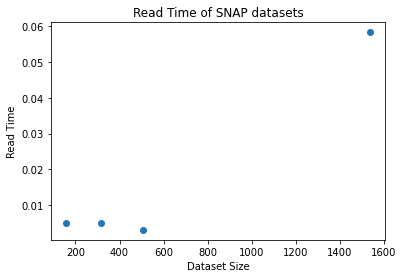

In [26]:
fig, ax = plt.subplots(1)
ax.set_xlabel("Dataset Size")
ax.set_ylabel("Read Time")
ax.set_title("Read Time of SNAP datasets")
x = dfSmall["size"]
y = dfSmall["readtime"]
ax.scatter(x,y)

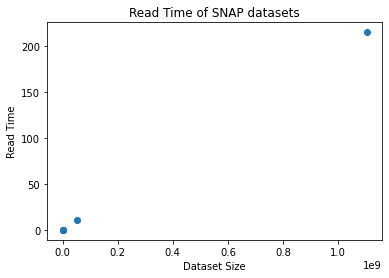

In [27]:
fig, ax = plt.subplots(1)
ax.set_xlabel("Dataset Size")
ax.set_ylabel("Read Time")
ax.set_title("Read Time of SNAP datasets")
x = dfSnap["size"]
y = dfSnap["readtime"]
ax.scatter(x,y)

In [28]:
dfs = pd.concat([dfSmall,dfSnap])

In [29]:
dfs

,name,size,readtime,processtime,numiters,ps
0,NCAA_football.csv,1537,0.058279,0.005431,60,"[0.0003086419753086419, 0.0019412966647411373,..."
1,karate.csv,156,0.004942,0.002188,22,"[0.09923539767696084, 0.054340605992493796, 0...."
2,dolphins.csv,318,0.005120,0.001140,21,"[0.017321061444381374, 0.025203285704505026, 0..."
3,lesmis.csv,508,0.003092,0.002090,37,"[0.006090850745438373, 0.017463951077734904, 0..."
0,amazon0505.txt,53709304,10.828782,1.826921,36,"[3.339207221449677e-07, 3.339207221449677e-07,..."
1,eg.txt,200,0.005116,0.000929,19,"[0.050522906063101045, 0.07047432568184558, 0...."
2,wiki-Vote.txt,1659144,0.267319,0.017263,15,"[0.00012051096649795132, 0.0001205109664979513..."
3,p2p-Gnutella05.txt,509544,0.095899,0.008578,7,"[1.7907996060341957e-05, 2.9134335715469556e-0..."
4,soc-LiveJournal1.txt,1103900488,214.733400,18.762511,22,"[1.1790286866375373e-06, 4.286432079428647e-06..."


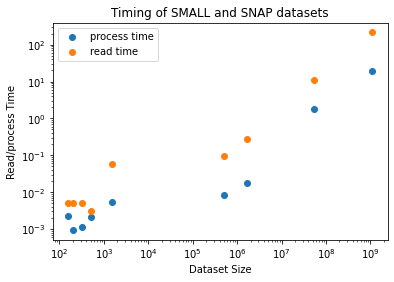

In [48]:
fig, ax = plt.subplots(1)
ax.set_xlabel("Dataset Size (bytes)")
ax.set_ylabel("Read/process Time (s)")
ax.set_title("Timing of SMALL and SNAP datasets")
ax.set_xscale("log")
ax.set_yscale("log")
pt = dfs["processtime"]
rt = dfs["readtime"]
numiters = dfs["numiters"]
size = dfs["size"]
ax.scatter(size,pt, label="process time")
ax.scatter(size,rt, label="read time")
ax.legend()